In [1]:
import pandas as pd
import numpy as np

In [2]:
with open('database.json') as file:
    data = pd.read_json(file)


In [3]:
data.style.set_properties(subset=['weather_forecast'], **{'width': '500px'})

,timestamp,indoor_temp,indoor_humidity,ambient_light,motion,outdoor_temp,outdoor_humidity,uv_index,rainfall,wind_speed,weather_forecast
0,2023-04-01 00:00:00+00:00,22.500000,65.000000,1000,False,18.000000,60,2,5,8,"{'timestamp': '2023-04-01T01:00:00Z', 'temp': 25.5, 'humidity': 75.0, 'uv_index': 5, 'rainfall': 1.0, 'wind_speed': 5.0}"
1,2023-04-01 01:00:00+00:00,32.000000,84.500000,4100,True,33.500000,95,8,0,4,"{'timestamp': '2023-04-01T02:00:00Z', 'temp': 28.0, 'humidity': 81.0, 'uv_index': 5, 'rainfall': 0.0, 'wind_speed': 7.0}"
2,2023-04-01 02:00:00+00:00,25.500000,84.000000,2320,False,27.000000,80,2,1,9,"{'timestamp': '2023-04-01T03:00:00Z', 'temp': 29.5, 'humidity': 95.0, 'uv_index': 3, 'rainfall': 11.0, 'wind_speed': 14.0}"
3,2023-04-01 03:00:00+00:00,21.000000,83.500000,2300,True,16.500000,75,3,0,8,"{'timestamp': '2023-04-01T04:00:00Z', 'temp': 16.0, 'humidity': 80.0, 'uv_index': 2, 'rainfall': 0.0, 'wind_speed': 9.0}"
4,2023-04-01 04:00:00+00:00,30.500000,83.000000,4440,False,36.000000,90,9,0,4,"{'timestamp': '2023-04-01T05:00:00Z', 'temp': 35.5, 'humidity': 95.0, 'uv_index': 10, 'rainfall': 0.0, 'wind_speed': 1.0}"
5,2023-04-01 05:00:00+00:00,20.000000,72.500000,2050,True,19.500000,75,3,1,7,"{'timestamp': '2023-04-01T06:00:00Z', 'temp': 18.0, 'humidity': 70.0, 'uv_index': 0, 'rainfall': 0.0, 'wind_speed': 1.0}"
6,2023-04-01 06:00:00+00:00,39.500000,100.000000,10060,False,40.000000,100,10,0,1,"{'timestamp': '2023-04-01T07:00:00Z', 'temp': 35.5, 'humidity': 95.0, 'uv_index': 7, 'rainfall': 0.0, 'wind_speed': 3.0}"
7,2023-04-01 07:00:00+00:00,39.000000,91.500000,8970,True,35.500000,95,8,0,3,"{'timestamp': '2023-04-01T08:00:00Z', 'temp': 39.0, 'humidity': 100.0, 'uv_index': 8, 'rainfall': 0.0, 'wind_speed': 3.0}"
8,2023-04-01 08:00:00+00:00,28.500000,81.000000,4080,False,29.000000,89,7,0,9,"{'timestamp': '2023-04-01T09:00:00Z', 'temp': 33.5, 'humidity': 95.0, 'uv_index': 7, 'rainfall': 0.0, 'wind_speed': 4.0}"
9,2023-04-01 09:00:00+00:00,18.000000,70.500000,2090,True,15.500000,70,2,0,4,"{'timestamp': '2023-04-01T10:00:00Z', 'temp': 13.0, 'humidity': 60.0, 'uv_index': 1, 'rainfall': 0.0, 'wind_speed': 5.0}"


In [4]:
data["future_temp"] = data["weather_forecast"].apply(lambda x: x["temp"])
data["future_humidity"] = data["weather_forecast"].apply(lambda x: x["humidity"])
data["future_uv"] = data["weather_forecast"].apply(lambda x: x["uv_index"])
data["future_rainfall"] = data["weather_forecast"].apply(lambda x: x["rainfall"])
data["future_wind_speed"] = data["weather_forecast"].apply(lambda x: x["wind_speed"])

In [5]:
data.style.set_properties(subset=['weather_forecast'], **{'width': '500px'})

,timestamp,indoor_temp,indoor_humidity,ambient_light,motion,outdoor_temp,outdoor_humidity,uv_index,rainfall,wind_speed,weather_forecast,future_temp,future_humidity,future_uv,future_rainfall,future_wind_speed
0,2023-04-01 00:00:00+00:00,22.500000,65.000000,1000,False,18.000000,60,2,5,8,"{'timestamp': '2023-04-01T01:00:00Z', 'temp': 25.5, 'humidity': 75.0, 'uv_index': 5, 'rainfall': 1.0, 'wind_speed': 5.0}",25.500000,75.000000,5,1.000000,5.000000
1,2023-04-01 01:00:00+00:00,32.000000,84.500000,4100,True,33.500000,95,8,0,4,"{'timestamp': '2023-04-01T02:00:00Z', 'temp': 28.0, 'humidity': 81.0, 'uv_index': 5, 'rainfall': 0.0, 'wind_speed': 7.0}",28.000000,81.000000,5,0.000000,7.000000
2,2023-04-01 02:00:00+00:00,25.500000,84.000000,2320,False,27.000000,80,2,1,9,"{'timestamp': '2023-04-01T03:00:00Z', 'temp': 29.5, 'humidity': 95.0, 'uv_index': 3, 'rainfall': 11.0, 'wind_speed': 14.0}",29.500000,95.000000,3,11.000000,14.000000
3,2023-04-01 03:00:00+00:00,21.000000,83.500000,2300,True,16.500000,75,3,0,8,"{'timestamp': '2023-04-01T04:00:00Z', 'temp': 16.0, 'humidity': 80.0, 'uv_index': 2, 'rainfall': 0.0, 'wind_speed': 9.0}",16.000000,80.000000,2,0.000000,9.000000
4,2023-04-01 04:00:00+00:00,30.500000,83.000000,4440,False,36.000000,90,9,0,4,"{'timestamp': '2023-04-01T05:00:00Z', 'temp': 35.5, 'humidity': 95.0, 'uv_index': 10, 'rainfall': 0.0, 'wind_speed': 1.0}",35.500000,95.000000,10,0.000000,1.000000
5,2023-04-01 05:00:00+00:00,20.000000,72.500000,2050,True,19.500000,75,3,1,7,"{'timestamp': '2023-04-01T06:00:00Z', 'temp': 18.0, 'humidity': 70.0, 'uv_index': 0, 'rainfall': 0.0, 'wind_speed': 1.0}",18.000000,70.000000,0,0.000000,1.000000
6,2023-04-01 06:00:00+00:00,39.500000,100.000000,10060,False,40.000000,100,10,0,1,"{'timestamp': '2023-04-01T07:00:00Z', 'temp': 35.5, 'humidity': 95.0, 'uv_index': 7, 'rainfall': 0.0, 'wind_speed': 3.0}",35.500000,95.000000,7,0.000000,3.000000
7,2023-04-01 07:00:00+00:00,39.000000,91.500000,8970,True,35.500000,95,8,0,3,"{'timestamp': '2023-04-01T08:00:00Z', 'temp': 39.0, 'humidity': 100.0, 'uv_index': 8, 'rainfall': 0.0, 'wind_speed': 3.0}",39.000000,100.000000,8,0.000000,3.000000
8,2023-04-01 08:00:00+00:00,28.500000,81.000000,4080,False,29.000000,89,7,0,9,"{'timestamp': '2023-04-01T09:00:00Z', 'temp': 33.5, 'humidity': 95.0, 'uv_index': 7, 'rainfall': 0.0, 'wind_speed': 4.0}",33.500000,95.000000,7,0.000000,4.000000
9,2023-04-01 09:00:00+00:00,18.000000,70.500000,2090,True,15.500000,70,2,0,4,"{'timestamp': '2023-04-01T10:00:00Z', 'temp': 13.0, 'humidity': 60.0, 'uv_index': 1, 'rainfall': 0.0, 'wind_speed': 5.0}",13.000000,60.000000,1,0.000000,5.000000


In [6]:
selected = [1 ,2 ,3 ,7 ,8 ,9 , 11, 12, 13, 14, 15]

In [7]:
selected_data = data.iloc[:,selected]

In [8]:
data_mean = np.mean(selected_data, axis=0)
data_sd = np.std(selected_data, axis=0)
adjusted_data = (selected_data - data_mean) / data_sd

<h1 style="text-align: center"> Data Splitting<h1>

In [9]:
def shuffle_data_numpy(X, y, numpy_seed):
    # fix the random seed
    np.random.seed(numpy_seed)

    # TODO Task 1.1
    # shuffle the given data pair (X, y)
    # please use numpy functions so that the results are controled by np.random.seed(numpy_seed)
    shuffled_array = np.random.permutation(X.shape[0])
    X_shuffle = X[shuffled_array]
    y_shuffle = y[shuffled_array]
    

    return X_shuffle, y_shuffle

def train_val_split(X_trainval, y_trainval, train_size, numpy_seed):
    # TODO TASK 1.2 
    # apply shuffle on the data with given random seed, then split the data into training and validation sets
    
    X_shuffle , y_shuffle = shuffle_data_numpy(X_trainval, y_trainval, numpy_seed)
    X_train = X_shuffle[:train_size]
    y_train = y_shuffle[:train_size]
    X_val = X_shuffle[train_size:]
    y_val = y_shuffle[train_size:]

    return X_train, X_val, y_train, y_val

In [10]:
truth = np.array([[26,10],[22, 6], [24, 7], [26, 8], [22, 6], [27, 8], [19, 0], [18, 2], [26, 5], [32, 8], [31, 9], [21, 2], [22, 8], [15, 2], [21, 2], [34, 10], [27, 7], [21, 2], [21, 4], [15, 1], [24, 3], [31, 3], [34, 4], [11, 0], [24, 5], [30, 7], [33,8], [13, 1], [23, 7], [29, 6], [30, 8], [25, 3], [25, 3], [13, 0], [23, 1], [32, 2], [34, 1], [11, 0], [33, 10], [26, 4]])


In [11]:
truth_mean = np.mean(truth, axis=0)
truth_sd = np.std(truth, axis=0)
adjusted_truth = (truth - truth_mean )/ truth_sd

In [12]:
X_train, X_val, y_train, y_val = train_val_split(np.array(adjusted_data), np.array(adjusted_truth), int(adjusted_data.shape[0]*0.7), 1)

In [13]:
print(X_train)
print(X_val)
print(y_train)
print(y_val)

[[-0.29963188  0.32009811 -1.16824815 -1.16666667 -0.40659758  0.48774391
   0.4104626   1.04648946 -0.53950682  0.6709313   0.97201785]
 [ 0.10895705  0.38731032  0.84046472  0.5        -0.40659758 -0.30052908
   1.19981377 -1.66813949  1.89207323 -0.6709313  -0.7117926 ]
 [-0.7082208   0.28649201 -1.17262443 -0.88888889 -0.56298127  0.29067566
  -0.84321277  0.23210078 -0.84345433 -0.6709313   0.20664946]
 [-1.25300603 -0.95693373  0.7310577  -0.88888889  1.00085559  0.09360742
  -1.40040183 -1.1252137  -0.84345433  1.15888134  0.35972314]
 [ 1.83411028  1.26106895  1.49690683  1.05555556 -0.56298127 -1.08880207
   0.92121924  0.77502657  0.6762832  -0.6709313  -0.7117926 ]
 [-0.61742326 -0.62087272 -0.03479143 -0.88888889  1.00085559  0.48774391
  -0.93607761 -0.8537508  -0.84345433  1.15888134  0.66587049]
 [-1.70699372 -1.96511677  0.29342962 -1.44444444  2.56469245  1.07894865
  -1.86472604 -1.93960238 -1.45134934  2.37875643  1.12509153]
 [ 0.29055212  0.35370422 -0.77875916  0.

In [14]:
# No additional import allowed
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from keras.layers import Dense

def MyModel(input_dim, dropout_ratio):
    # Create a sequential model
    model = Sequential()


    model.build((None,input_dim))
    
    
    
    model.add(Dense(units = 64, activation = 'relu', kernel_initializer = "uniform"))
    model.add(Dropout(rate = dropout_ratio))
    
    model.add(Dense(units = 32, activation = 'relu', kernel_initializer = "uniform"))
    model.add(Dropout(rate = dropout_ratio))
    
    model.add(Dense(units = 16, activation = 'relu', kernel_initializer = "uniform"))
    model.add(Dropout(rate = dropout_ratio))
    
    model.add(Dense(units = 4, activation = 'relu', kernel_initializer = "uniform"))
    model.add(Dropout(rate = dropout_ratio))
    
    
    model.add(Dense(units = 1, activation = 'sigmoid', kernel_initializer = "uniform"))
    
    
    
    return model

In [15]:
# Keep them as the default setting for the model you submitted to ZINC!
input_dim = len(selected)
dropout_ratio = 0.1

In [16]:
from tensorflow.keras.optimizers import Adam

def MyModel_Training(model, X_train, y_train, X_val, y_val, batchsize, train_epoch):

    # TODO Task 2.2
    # Compile and train the given model
    # Hint: history can be returned by model.fit() function, please see https://keras.io/api/models/model_training_apis/
    adam_optimizer = Adam(learning_rate = 1e-3)
    
    model.compile(
        optimizer= adam_optimizer, 
        loss = 'mse',
        metrics =['mae'])
    
    history = model.fit(x = X_train, y = y_train, batch_size = batchsize, epochs = train_epoch, validation_data = (X_val, y_val))
    
    
    return history, model

model = MyModel(input_dim, dropout_ratio)

batchsize = 4
train_epoch = 50

history, model = MyModel_Training(model, X_train, y_train[:,0], X_val, y_val[:,0], batchsize, train_epoch)
test_loss, test_mae = model.evaluate(X_val, y_val, verbose=1)
print(f'Test Mean Average Error (MAE): {test_mae}')
model.summary()

Epoch 1/50
7/7 [==============================] - 1s 22ms/step - loss: 1.2995 - mae: 0.9333 - val_loss: 1.1337 - val_mae: 0.8314
Epoch 2/50
7/7 [==============================] - 0s 6ms/step - loss: 1.2979 - mae: 0.9327 - val_loss: 1.1323 - val_mae: 0.8306
Epoch 3/50
7/7 [==============================] - 0s 6ms/step - loss: 1.2957 - mae: 0.9318 - val_loss: 1.1305 - val_mae: 0.8296
Epoch 4/50
7/7 [==============================] - 0s 6ms/step - loss: 1.2926 - mae: 0.9307 - val_loss: 1.1276 - val_mae: 0.8281
Epoch 5/50
7/7 [==============================] - 0s 6ms/step - loss: 1.2868 - mae: 0.9282 - val_loss: 1.1221 - val_mae: 0.8255
Epoch 6/50
7/7 [==============================] - 0s 6ms/step - loss: 1.2739 - mae: 0.9221 - val_loss: 1.1089 - val_mae: 0.8198
Epoch 7/50
7/7 [==============================] - 0s 7ms/step - loss: 1.2435 - mae: 0.9076 - val_loss: 1.0786 - val_mae: 0.8070
Epoch 8/50
7/7 [==============================] - 0s 6ms/step - loss: 1.1774 - mae: 0.8750 - val_loss: 

In [18]:
test = [38.5, 80, 10000, 9, 5, 2, 40.5, 90, 6, 0, 0]
adjusted_test = (test - data_mean) / data_sd
prediction = model.predict(np.array(adjusted_test).reshape(1, -1))
prediction*truth_sd[0] + truth_mean[0]

1/1 [==============================] - 0s 13ms/step


array([[24.354755]], dtype=float32)

In [19]:
model.save('./smartHome.keras')

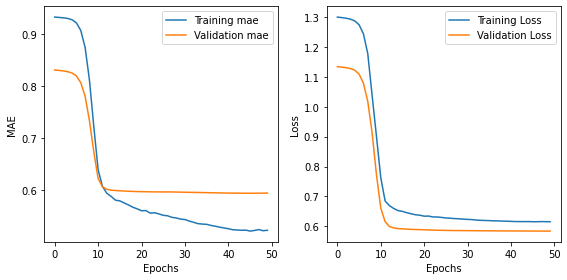

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['mae'], label='Training mae')
plt.plot(history.history['val_mae'], label='Validation mae')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

1/1 [==============================] - 0s 9ms/step


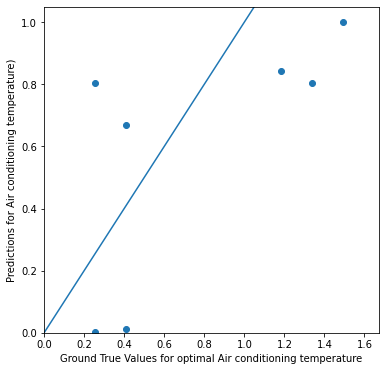

In [25]:
test_predictions = model.predict(X_val).flatten()

plt.figure(figsize=(6, 6))
plt.scatter(y_val[:,0], test_predictions)
plt.xlabel('Ground True Values for optimal Air conditioning temperature')
plt.ylabel('Predictions for Air conditioning temperature)')
# plt.axis('equal')
# plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 3000], [-100, 3000])